0.0506286620812


<IPython.core.display.Javascript object>


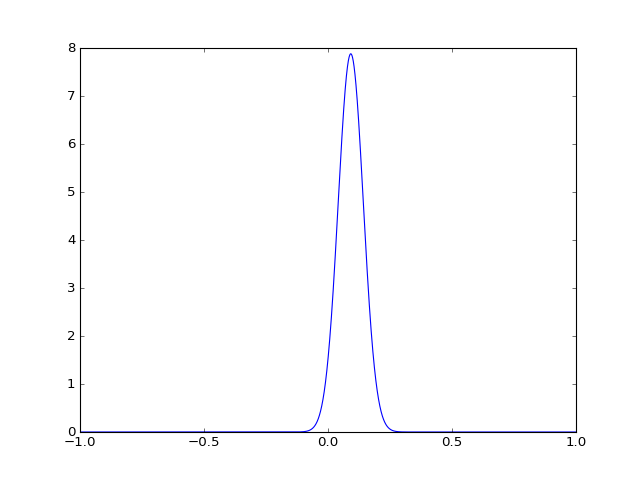

In [9]:
import numpy as np
import matplotlib.pylab as plt
import math as math
from scipy.optimize import fmin
from iminuit import Minuit, describe, Struct
%matplotlib  notebook

# So here's your signal and background
Nsig = 1000
sig_mean = 10.4
sig_width = 0.05
signal = np.random.normal(sig_mean,sig_width,Nsig)
Nbkg = 9500
background = 9.0+(2*np.random.random(Nbkg))
data = signal.copy()
data = np.append(data,background.copy())

probability_background=.5
lower_mean=10.0 #start 10.4
lower_width=0.02 #start 0.05
min_frac=0.04

def probability(mean,width,frac):
    x=data
    signal_prob=(1.0/(width*np.sqrt(2*np.pi)))*np.exp(-(x-mean)**2/(2*(width**2)))
    tot_prob= -np.log(frac*signal_prob+ ((1-frac)*probability_background)).sum()
    return tot_prob
def normal(x,mean,width):
    return (1.0/(width*np.sqrt(2*np.pi)))*(np.exp(-(x-mean)**2/(2*(width**2))))

m=Minuit(probability, mean=lower_mean, error_mean=0.1, limit_mean=(0.,200.), width= lower_width, error_width=0.1, limit_width=(0.01,10), frac= min_frac, limit_frac=(0.01,1), error_frac=0.1, print_level=0,errordef = 0.5)
m.migrad()
param=m.values.values()
err=m.errors.values()
print param[0]

x = np.linspace(-1,1,100000)
y=normal(x,param[1], param[0])
plt.plot(x,y)

